Tutte le funzionalità sono integrate in un unico codice:

* Analisi del mondo di gioco
* Identificazione del percorso ottimale utilizzando algoritmi genetici
* Derivazione delle azioni da intraprendere basate sul percorso ottimale
* Implementazione delle azioni nel mondo di gioco

In [17]:
import gym
import nle
import sys
import time
from IPython.display import clear_output

sys.path.append('minihack/')
from minihack import LevelGenerator
from nle import nethack

sys.path.append('../')
from WorldParser import WorldParser
from GeneticAlgorithm import GeneticAlgorithm
from AgentActions import AgentActions


des_file = """
MAZE: "mylevel", ' '
FLAGS:premapped
GEOMETRY:center,center

MAP
|||||||||||||
|...........|
|..|........|
|...........|
|.......|...|
|.....|.....|
|...|....|..|
|||||||||||||
ENDMAP

BRANCH:(1,1,1,1),(0,0,0,0)
GOLD:1,(1,2)
GOLD:1,(2,1)
GOLD:1,(7,4)
GOLD:1,(9,4)
GOLD:1,(11,5)
GOLD:1,(6,1)

"""

starting_position = (1,1)

**Generazione del grafo del mondo di gioco**

In [18]:
parser = WorldParser(des_file)
gold_positions = parser.extract_gold_positions()
world_graph = parser.extract_world_graph()

**Applicazione algoritmo genetico**

/home/kamer/miniconda3/envs/nle/lib/python3.8/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/kamer/miniconda3/envs/nle/lib/python3.8/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Starting position: (1, 1)
Miglior percorso: [(2, 1), (4, 7), (5, 11), (4, 9), (1, 6), (1, 2), (1, 1)]
Distanza del miglior percorso: 21


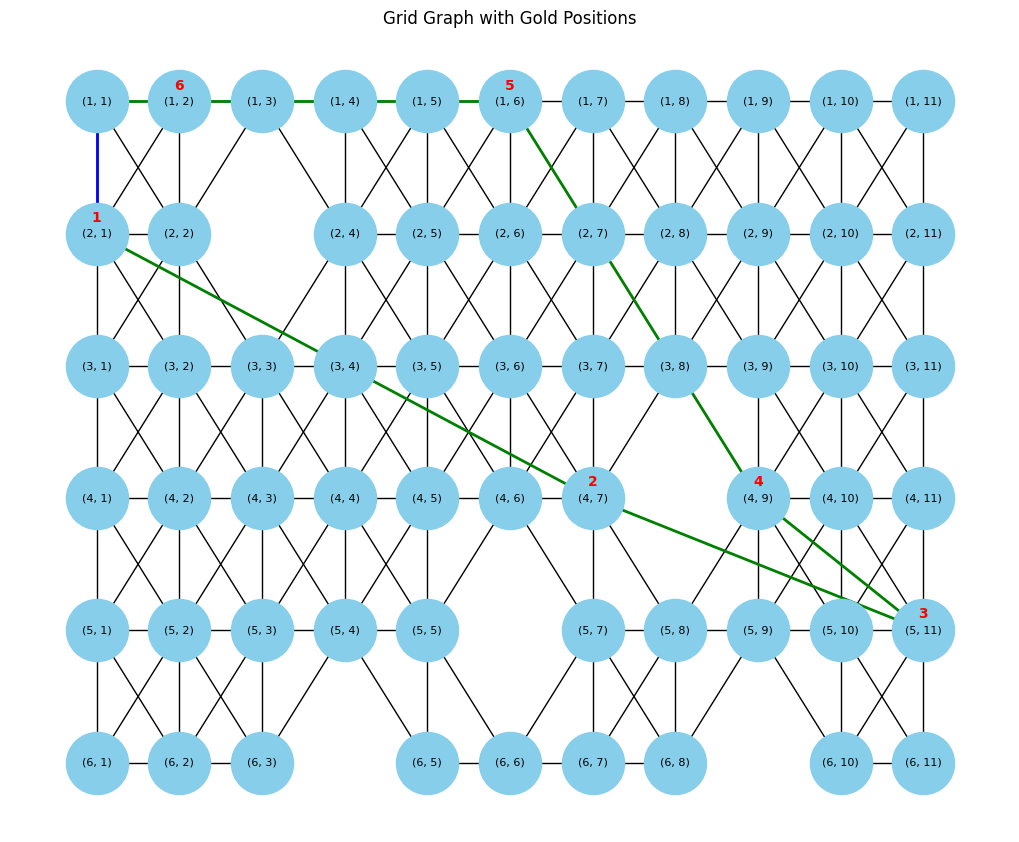

In [19]:
optimizer = GeneticAlgorithm(world_graph, gold_positions, starting_position=starting_position)
best_route, best_distance = optimizer.optimize()
print("Starting position:", optimizer.starting_position)
print("Miglior percorso:", best_route)
print("Distanza del miglior percorso:", best_distance)

optimizer.plot_world_graph(best_route)

**Generazione azioni a partire dal percorso migliore**

In [20]:
agentActions = AgentActions(world_graph, starting_position)
actions = agentActions.get_agent_actions(best_route)

**Applicazione delle azioni**

In [21]:
env = gym.make("MiniHack-Skill-Custom-v0",
    des_file=des_file)
env.reset()
env.render()
time.sleep(0.5)  # Attendi 500ms

for action in actions:
    env.step(action)
    clear_output(wait=True)
    env.render()
    time.sleep(0.5)  # Attendi 500ms


                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                -------------                                   
                                |@..........|                                   
                                |..|........|                                   
                                |...........|                                   
                           